In [1]:
import joblib
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pickle
import time
from tkinter import *
from tkinter import filedialog
from tqdm import tqdm
from tqdm import notebook
import itertools
import math
import seaborn as sns

In [3]:
# Create Tk root
root = Tk()
# Hide the main window
root.withdraw()
root.call('wm', 'attributes', '.', '-topmost', True)
infiles = filedialog.askopenfilename(multiple=True, title='load posthoc-predictions.npy')

%gui tk

In [3]:
infiles

('/Volumes/yttri/temp/VideoOutputCamera 0-06022023-162543_posthoc-predictions.npy',)

In [4]:
predictions = []
for f in range(len(infiles)):
    predictions.append(np.load(infiles[f]))

In [5]:
#(totaltime of ms1, totaltime of ms2) ... in tenths of seconds
#if two videos 
#(len(predictions[0]), len(predictions[1]))

len(predictions[0]), "tenths of seconds in video"

#sns.barplot(data=df, x="behavior", y="animal")

(27465, 'tenths of seconds in video')

In [6]:
# for f in range(len(infiles)):
data_dict = {'animal':np.hstack(([np.repeat(infiles[f].rpartition('_post')[0].rpartition('/')[2].rpartition(' 0-')[2], len(predictions[f])) 
                                  for f in range(len(infiles))])),
             'behavior': np.hstack([predictions[f] for f in range(len(predictions))])}
data_dict
                                                                    
df = pd.DataFrame(data = data_dict)
df

,animal,behavior
0,06022023-162543,5.0
1,06022023-162543,5.0
2,06022023-162543,5.0
3,06022023-162543,5.0
4,06022023-162543,5.0
...,...,...
27460,06022023-162543,5.0
27461,06022023-162543,1.0
27462,06022023-162543,5.0
27463,06022023-162543,5.0


<AxesSubplot:xlabel='behavior', ylabel='Count'>

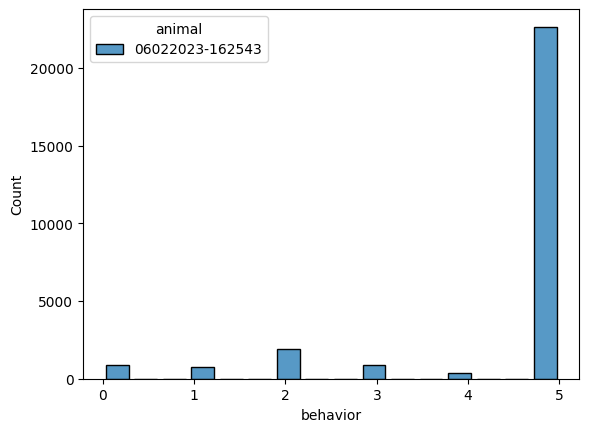

In [7]:
sns.histplot(data=df, x="behavior", hue="animal", 
             multiple="dodge", shrink=.8)

<AxesSubplot:xlabel='behavior', ylabel='Probability'>

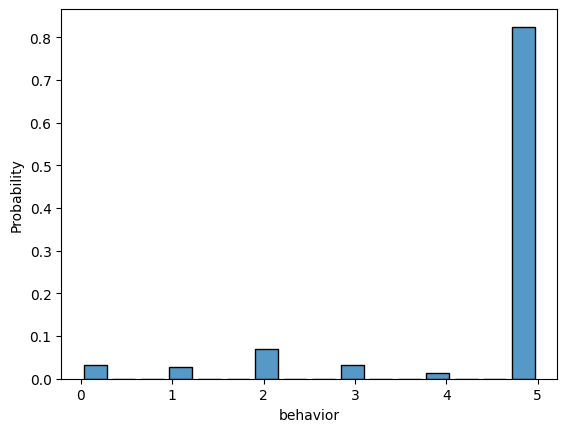

In [8]:
sns.histplot(data=df, x="behavior",
             stat='probability',
             multiple="dodge", shrink=.8)

In [9]:
#behavior plot over time for ms1 only 

ms1 = predictions[0]
data_dict2 = {'time': np.hstack([f for f in range(len(predictions[0]))]),
              'locomotion count': np.hstack([predictions[0][f] for f in range(len(ms1))])}

df2 = pd.DataFrame(data= data_dict2) 
#Keep only the rows that include the behavior of interest 
behav_interest = 2
df3 = df2.loc[df2["locomotion count"] == behav_interest]
df3

,time,locomotion count
3001,3001,2.0
3002,3002,2.0
3003,3003,2.0
3005,3005,2.0
3010,3010,2.0
...,...,...
27396,27396,2.0
27399,27399,2.0
27428,27428,2.0
27429,27429,2.0


<AxesSubplot:xlabel='time', ylabel='Count'>

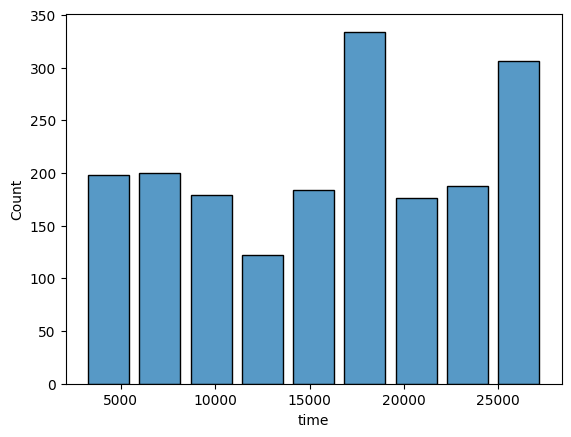

In [10]:
sns.histplot(data=df3, x='time', 
             stat='count',
             multiple='dodge', shrink=.8, bins=9)
#3000 tenths of a second = 5 minutes
#There doesn't seem to be a great difference in locomotion count that relates
# to interjection of stim
# The first bin represents the first 5 minutes of pre-stime, 
# which oddly shows the highest count of locomotive bouts

## Analysis of bouts 

In [52]:
#data_dict3 = {'time': np.hstack([f for f in range(len(predictions[0]))]),
#              'bouts': np.hstack([0 for f in range(len(predictions[0]))])}
#
#df4 = pd.DataFrame(data= data_dict3) 
#df4

In [11]:
np.where(predictions[0] == 2)[0][0]

3001

In [12]:
#OLD VERSION ~!
array_an1 = predictions[0].copy()

count = 0

#index of where the behavior changes gives us where each bout begins 
behav_start_an1 = np.where(np.diff(array_an1) != 0)
# bin every 5 minutes (3000 * 100ms)
time_ranges = [[i*3000, (i+1)*3000] for i in range(9)]

#constrain it to behavior of interest
behav_interest = 2
counts_5min_bins = []
when_occurred_5min_bins = []
for _, idx in enumerate(behav_start_an1[0]):
    if array_an1[idx+1] == behav_interest: 
        count = 0
        when_occurred = []
        for time_range in time_ranges:
            if ((idx > time_range[0]) and (idx < time_range[1])):
                # print(time_range)
                count += 1 
                when_occurred.append(idx)
        counts_5min_bins.append(count)
        when_occurred_5min_bins.append(when_occurred)
#count is now number of behavior of interest bouts ! 

f"There are {counts_5min_bins[2]} number of behavior of interest bouts in second 5 minutes"

#data_dict3 = {'time': np.hstack([f for f in range(len(array_an1))]), 
#              'behav_interest bouts': np.hstack([(count+1) for i in range(len(behav_start_an1[0])) (if array_an1[i+1] == behav_interest)]) }
#df4 = pd.DataFrame(data=data_dict3)


'There are 1 number of behavior of interest bouts in second 5 minutes'

In [32]:
array_an1 = predictions[0].copy()

count = 0

#index of where the behavior changes gives us where each bout begins 
behav_start_an1 = np.where(np.diff(array_an1) != 0)
# bin every 5 minutes (3000 * 100ms)
time_ranges = [[i*3000, (i+1)*3000] for i in range(9)]

#constrain it to behavior of interest
behav_interest = 2
counts_5min_bins = []
when_occurred_5min_bins = []
when_occurred = []

for time_range in time_ranges: 
    count = 0
    for _, idx in enumerate(behav_start_an1[0]):
        if ((idx > time_range[0]) and (idx < time_range[1])): # if in the correct 5 min bin
            if array_an1[idx+1] == behav_interest: # if the value at bout index is behav_interest, add to count
                count += 1 
                when_occurred.append(idx)
    counts_5min_bins.append(count) 
when_occurred_5min_bins.append(when_occurred) 
#Count is the number of behavior of interest bouts! 
            
    
print(counts_5min_bins, len(counts_5min_bins))
f"There are {counts_5min_bins[2]} number of behavior of interest bouts in second 5-minute-bin"


[0, 44, 51, 52, 21, 68, 78, 34, 50] 9


'There are 51 number of behavior of interest bouts in second 5-minute-bin'

In [13]:
time_ranges = [[i*3000, (i+1)*3000] for i in range(9)]
time_ranges

[[0, 3000],
 [3000, 6000],
 [6000, 9000],
 [9000, 12000],
 [12000, 15000],
 [15000, 18000],
 [18000, 21000],
 [21000, 24000],
 [24000, 27000]]

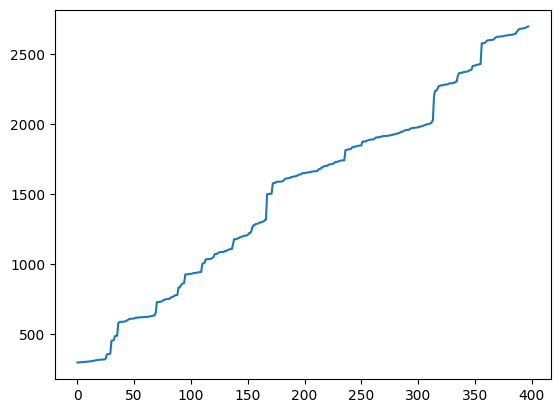

In [33]:
plt.plot(np.array(when_occurred)/10)

# x-axis represents the bout number
# y-axis represents the temporal position of bout
# Steeper slope means shorter duration of bouts.
# Longer run means longer duration of bouts.

In [43]:
data_dict_bout = {'time': np.hstack([time_ranges[f][0] for f in range(len(time_ranges))]),
              'locomotive bouts count': np.hstack([counts_5min_bins[f] for f in range(len(counts_5min_bins))])}

df4 = pd.DataFrame(data= data_dict_bout) 
df4

,time,locomotive bouts count
0,0,0
1,3000,44
2,6000,51
3,9000,52
4,12000,21
5,15000,68
6,18000,78
7,21000,34
8,24000,50


<AxesSubplot:xlabel='time', ylabel='locomotive bouts count'>

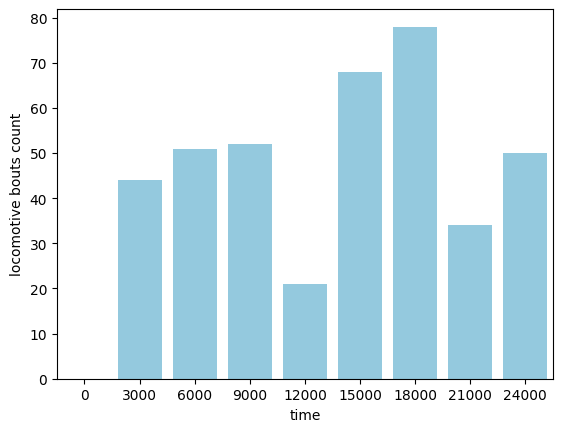

In [50]:
sns.barplot(data=df4, x="time", y="locomotive bouts count", color='skyblue')